In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
dataset_train.head()

In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1: 2].values

In [ ]:
training_set.shape

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
dataset_test.head()

In [ ]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

5/5 [==============================] - 0s 6ms/step


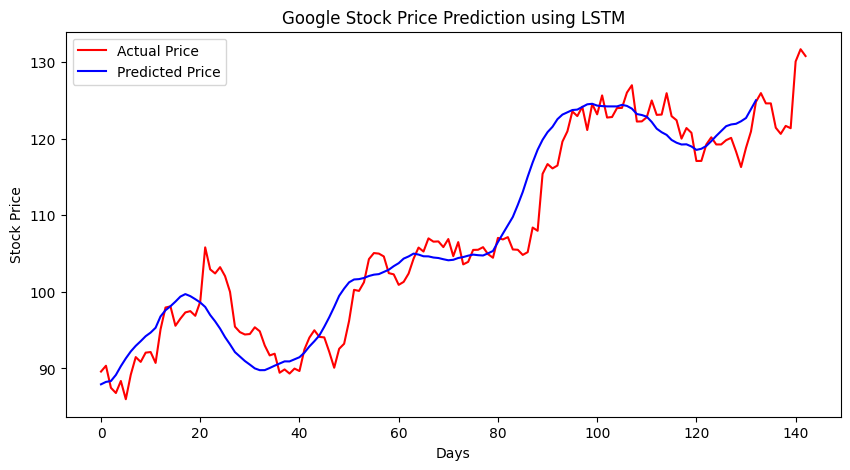

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ---------- 1. Load CSVs ----------
train_df = pd.read_csv("Google_Stock_Train.csv")  # Must have 'Open' column
test_df = pd.read_csv("Google_Stock_Test.csv")    # Must have 'Open' column

# train_prices = train_df['Open'].values.reshape(-1, 1)
# test_prices = test_df['Open'].values.reshape(-1, 1)

train_prices = train_df[['Open']].values
test_prices = test_df[['Open']].values



# ---------- 2. Normalize prices ----------
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_prices)
test_scaled = scaler.transform(test_prices)

# ---------- 3. Prepare training data ----------
X_train = []
y_train = []
for i in range(10, len(train_scaled)):
    X_train.append(train_scaled[i-10:i, 0])  # Previous 10 days
    y_train.append(train_scaled[i, 0])       # Next day

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # [samples, timesteps, features]

# ---------- 4. Build LSTM Model ----------
model = Sequential()
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))  # Predict next price
# ----compile ho rha h----------
model.compile(loss='mse')

# ------train ho rha h-----------
model.fit(X_train, y_train)


X_test = []
y_test = []
for i in range(10, len(test_scaled)):
    X_test.append(test_scaled[i-10:i, 0])
    y_test.append(train_scaled[i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)

# ---------- 6. Predict ----------
predicted_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)
# ---------- 7. Plot ----------
plt.figure(figsize=(10,5))
plt.plot(test_prices, color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/20
204/204 [==============================] - 6s 10ms/step - loss: 2863.4812
Epoch 2/20
204/204 [==============================] - 2s 10ms/step - loss: 1936.9438
Epoch 3/20
204/204 [==============================] - 2s 10ms/step - loss: 1507.8661
Epoch 4/20
204/204 [==============================] - 2s 11ms/step - loss: 1203.1632
Epoch 5/20
204/204 [==============================] - 2s 11ms/step - loss: 975.0015
Epoch 6/20
204/204 [==============================] - 2s 10ms/step - loss: 800.4398
Epoch 7/20
204/204 [==============================] - 2s 10ms/step - loss: 665.3664
Epoch 8/20
204/204 [==============================] - 2s 10ms/step - loss: 556.0930
Epoch 9/20
204/204 [==============================] - 2s 10ms/step - loss: 464.8966
Epoch 10/20
204/204 [==============================] - 2s 10ms/step - loss: 387.8544
Epoch 11/20
204/204 [==============================] - 2s 11ms/step - loss: 322.6088
Epoch 12/20
204/204 [==============================] - 2s 10ms/step - 

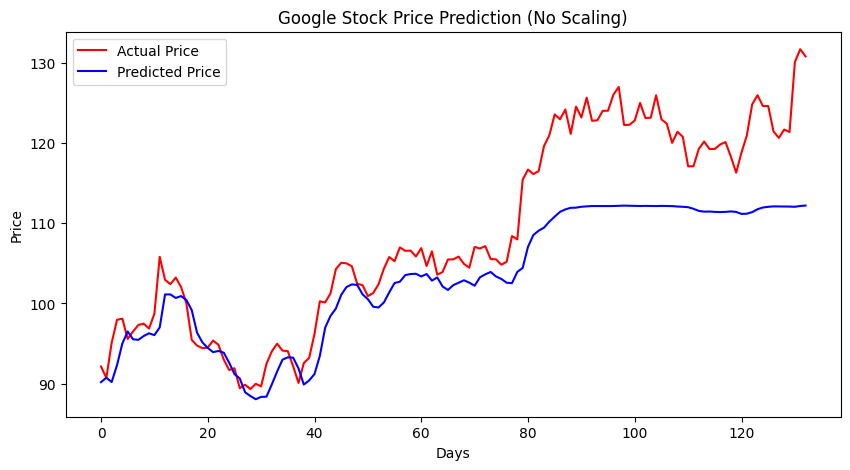

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load data
train_df = pd.read_csv("Google_Stock_Train.csv")  # Must have 'Open' column
test_df  = pd.read_csv("Google_Stock_Test.csv")   # Must have 'Open' column

train_prices = train_df[['Open']].values  # shape = (n_train, 1)
test_prices  = test_df[['Open']].values   # shape = (n_test, 1)

# 2. Prepare sequences (10-day windows)
n_window = 10
X_train, y_train = [], []
for i in range(n_window, len(train_prices)):
    X_train.append(train_prices[i-n_window:i, 0])
    y_train.append(train_prices[i, 0])

X_train = np.array(X_train)                # (n_train-n_window, n_window)
y_train = np.array(y_train)                # (n_train-n_window,)
X_train = X_train.reshape((-1, n_window, 1))  # LSTM expects 3D: [samples, timesteps, features]

# 3. Build and train LSTM model
model = Sequential([
    LSTM(units=50, activation='tanh', input_shape=(n_window, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# 4. Prepare test sequences
X_test, y_test = [], []
for i in range(n_window, len(test_prices)):
    X_test.append(test_prices[i-n_window:i, 0])
    y_test.append(test_prices[i, 0])

X_test = np.array(X_test).reshape((-1, n_window, 1))
y_test  = np.array(y_test)

# 5. Predict and plot
predicted = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Price', color='red')
plt.plot(predicted, label='Predicted Price', color='blue')
plt.title('Google Stock Price Prediction (No Scaling)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [1]:
import sklearn.metrics
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_log_loss_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_s

In [2]:
import tensorflow.keras.models
print(dir(tensorflow.keras.models))

['Model', 'Sequential', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'clone_model', 'experimental', 'load_model', 'model_from_config', 'model_from_json', 'model_from_yaml', 'save_model']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
tr_df=pd.read_csv("Google_stock_train.csv")
ts_df=pd.read_csv("Google_stock_test.csv")
tr_df.sample()


,Date,Open,High,Low,Close,Adj Close,Volume
416,2011-08-26,13.012763,13.274525,12.841341,13.184685,13.184685,143708148


In [5]:
ts_df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
39,2023-03-01,89.980003,91.029999,89.669998,90.360001,90.360001,31111200


In [6]:
tr=tr_df[['Open']].values
ts=ts_df[['Open']].values

In [7]:
sc=MinMaxScaler()
tr_sc=sc.fit_transform(tr)
ts_sc=sc.fit_transform(ts)

In [36]:
xtr=[]
ytr=[]
for i in range(10 ,len(tr_sc)):
    xtr.append(tr_sc[i-10:i,0])
    ytr.append(tr_sc[i,0])
xtr=np.array(xtr)
ytr=np.array(ytr)
xtr= xtr.reshape(xtr.shape[0],xtr.shape[1], 1) 

In [37]:
model=Sequential()
model.add(LSTM(units=50 ,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse')
 # [samples, timesteps, features]

model.fit(xtr,ytr)

102/102 [==============================] - 5s 13ms/step - loss: 0.0107


In [40]:
xts=[]
yts=[]
for i in range(10 ,len(ts_sc)):
    xts.append(ts_sc[i-10:i,0])
    yts.append(tr_sc[i,0])
xts=np.array(xts)
xts= xts.reshape(xts.shape[0],xts.shape[1], 1) 
yts=np.array(yts)

In [41]:
pd=model.predict(xts)

5/5 [==============================] - 0s 7ms/step


In [39]:
pdp=sc.inverse_transform(pd)

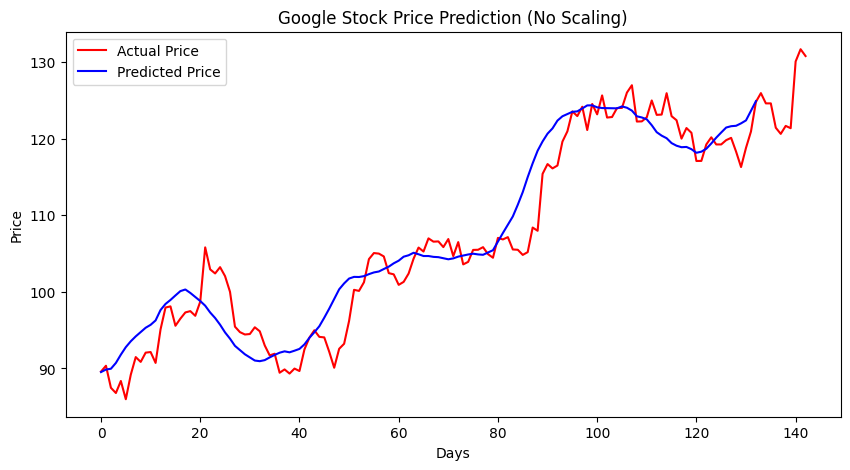

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Actual Price', color='red')
plt.plot(pdp, label='Predicted Price', color='blue')
plt.title('Google Stock Price Prediction (No Scaling)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ---------- 1. Load CSVs ----------
train_df = pd.read_csv("Google_Stock_Train.csv")  # Must have 'Open' column
test_df = pd.read_csv("Google_Stock_Test.csv")    # Must have 'Open' column

train_prices = train_df[['Open']].values
test_prices = test_df[['Open']].values

# ---------- 3. Prepare training data ----------
X_train = []
y_train = []
for i in range(10, len(train_prices)):
    X_train.append(train_prices[i-10:i, 0])
    y_train.append(train_prices[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # [samples, timesteps, features]

# ---------- 4. Build LSTM Model ----------
model = Sequential()
model.add(LSTM(units=50, activation='tanh'))
model.add(Dense(1))  # Predict next price

model.compile(loss='mse')
model.fit(X_train, y_train)

# ---------- 5. Prepare test data ----------
X_test = []
y_test = []
for i in range(10, len(test_prices)):
    X_test.append(test_prices[i-10:i, 0])
    y_test.append(test_prices[i, 0])

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)

# ---------- 6. Predict ----------
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)

# ---------- 7. Plot ----------
plt.figure(figsize=(10, 5))
plt.plot(y_test, color='red', label='Actual Price')
plt.grid(True)
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction using LSTM (No Normalization)')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


5/5 [==============================] - 1s 6ms/step


NameError: name 'scaler' is not defined